In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

data = pd.DataFrame({'X': x, 'Y': y})

X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=0)


In [3]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)


In [4]:
elastic_net.fit(X_train, y_train)


ElasticNet(random_state=0)

In [5]:
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

In [6]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")

Training Mean Squared Error: 719.734447511239
Testing Mean Squared Error: 505.98380672270633


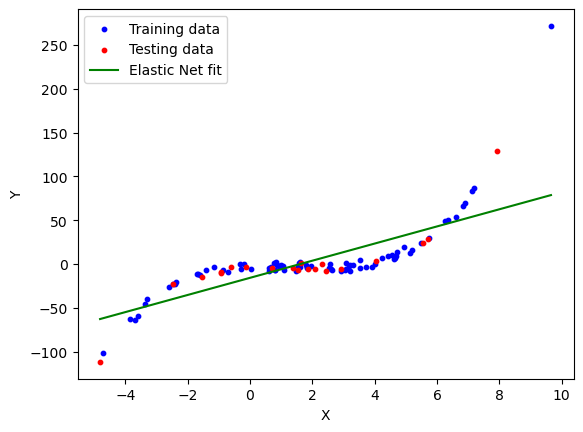

In [7]:
plt.scatter(X_train, y_train, color='blue', s=10, label='Training data')
plt.scatter(X_test, y_test, color='red', s=10, label='Testing data')
X_sorted = data[['X']].sort_values(by='X')
y_pred_sorted = elastic_net.predict(X_sorted)

plt.plot(X_sorted, y_pred_sorted, color='green', label='Elastic Net fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()